In [1]:
import numpy as np
import matplotlib.pyplot as plt
from indeterminatebeam import Beam, Support, DistributedLoadV

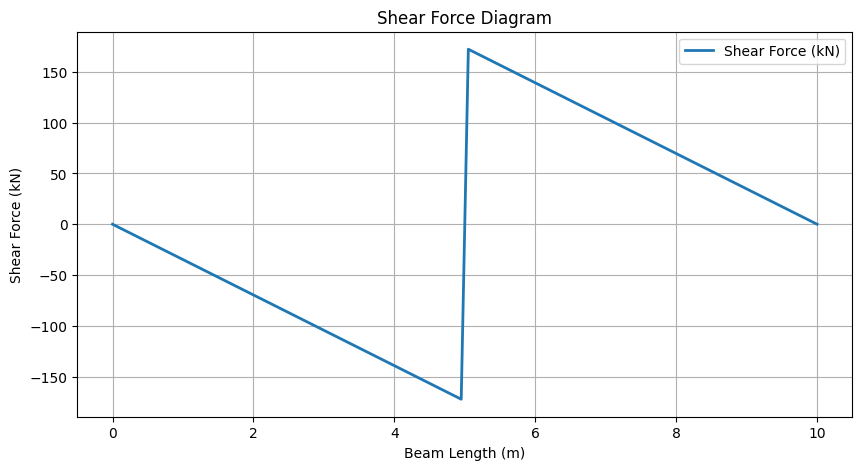

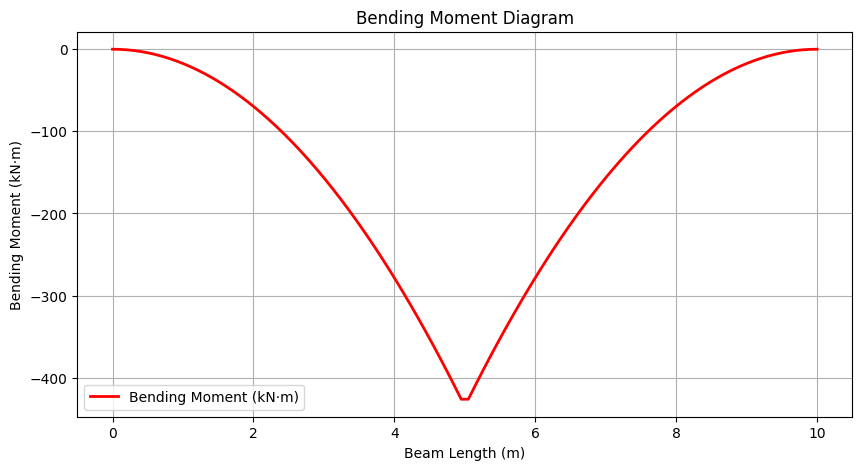

In [3]:
# Beam details
span = 10  # m
central_support = 5  # m from left (center column)
dead_load = 4.8 # kN/m
live_load = 1  # kN/m
total_load = (dead_load + live_load)*6  # Combined load

# Initialize the beam
beam = Beam(span)

# Add central support (cantilever-like behavior)
support = Support(central_support, fixed=(1, 1, 1))  # fixed
beam.add_supports(support)

# Apply uniformly distributed load
beam.add_loads(DistributedLoadV(-total_load, (0, span)))  # Negative since it acts downwards

# Analyze the beam
beam.analyse()

# Retrieve Shear and Moment data
x_coords = np.linspace(0, span, 100)
shear_forces = [beam.get_shear_force(x) for x in x_coords]
bending_moments = [beam.get_bending_moment(x) for x in x_coords]

# Plot Shear Force Diagram
plt.figure(figsize=(10, 5))
plt.plot(x_coords, shear_forces, label="Shear Force (kN)", lw=2)
plt.title("Shear Force Diagram")
plt.xlabel("Beam Length (m)")
plt.ylabel("Shear Force (kN)")
plt.grid()
plt.legend()
plt.show()

# Plot Bending Moment Diagram
plt.figure(figsize=(10, 5))
plt.plot(x_coords, bending_moments, label="Bending Moment (kN·m)", color='red', lw=2)
plt.title("Bending Moment Diagram")
plt.xlabel("Beam Length (m)")
plt.ylabel("Bending Moment (kN·m)")
plt.grid()
plt.legend()
plt.show()

In [4]:
fig_1 = beam.plot_beam_external()
fig_1.show()

fig_2 = beam.plot_beam_internal()
fig_2.show()


In [9]:
%matplotlib inline

# import beam and supports
from indeterminatebeam import Beam, Support

# import loads (all load types imported for reference)
from indeterminatebeam import (
    PointTorque,
    PointLoad,
    PointLoadV,
    PointLoadH,
    UDL,
    UDLV,
    UDLH,
    TrapezoidalLoad,
    TrapezoidalLoadV,
    TrapezoidalLoadH,
    DistributedLoad,
    DistributedLoadV,
    DistributedLoadH
)

# Note: load ending in V are vertical loads
# load ending in H are horizontal loads
# load not ending in either takes angle as an input (except torque)


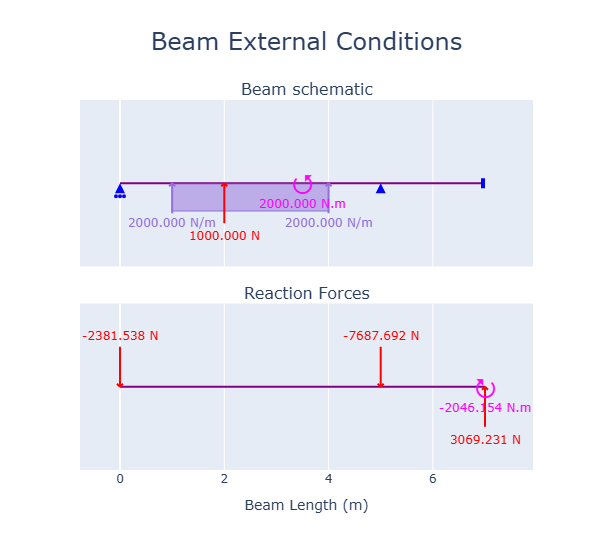

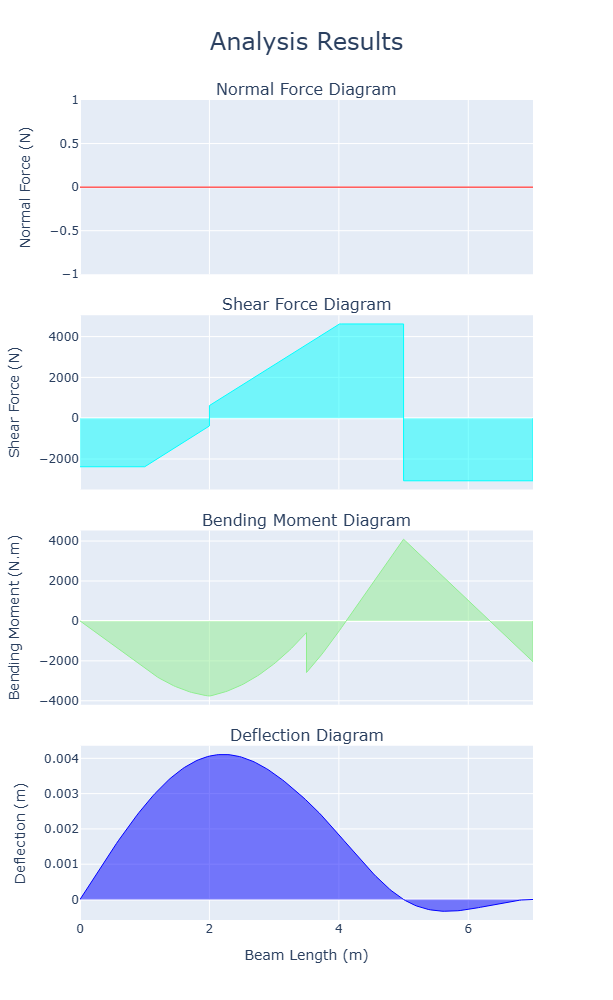

In [10]:
# Arbritrary example defined in README.md
beam = Beam(7)                          # Initialize a Beam object of length 7 m with E and I as defaults
beam_2 = Beam(9,E=2000, I =100000)      # Initialize a Beam specifying some beam parameters

a = Support(5,(1,1,0))                  # Defines a pin support at location x = 5 m  
b = Support(0,(0,1,0))                  # Defines a roller support at location x = 0 m
c = Support(7,(1,1,1))                  # Defines a fixed support at location x = 7 m
beam.add_supports(a,b,c)    

load_1 = PointLoadV(1000,2)                # Defines a point load of 1000 N acting up, at location x = 2 m
load_2 = DistributedLoadV(2000,(1,4))      # Defines a 2000 N/m UDL from location x = 1 m to x = 4 m 
load_3 = PointTorque(2*10**3, 3.5)            # Defines a 2*10**3 N.m point torque at location x = 3.5 m
beam.add_loads(load_1,load_2,load_3)    # Assign the support objects to a beam object created earlier

beam.analyse()

fig_1 = beam.plot_beam_external()
fig_1.show()

fig_2 = beam.plot_beam_internal()
fig_2.show()

# save the results (optional)
# Can save figure using ``fig.write_image("./results.pdf")`` (can change extension to be
# png, jpg, svg or other formats as reired). Requires pip install -U kaleido

# fig_1.write_image("./readme_example_diagram.png")
# fig_2.write_image("./readme_example_internal.png")